In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit import * 
from qiskit import IBMQ
%matplotlib inline

In [3]:
#Make sure if account is liked to API to use IBMs QC
IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
#Create a quantum and classical register. Registers are a collection of qubits or bits
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [5]:
#Create a quantum circuit
circuit = QuantumCircuit(qr, cr)

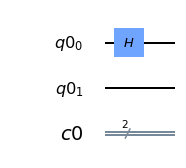

In [6]:
#Apply the Hadamard Gate to the first qubit. Hadamard gate has capacity to transform a definite quantum state, such as spin-up, into a murky one, such as a superposition of both. spin-up and spin-down at the same time.

circuit.h(qr[0])
circuit.draw(output = 'mpl')

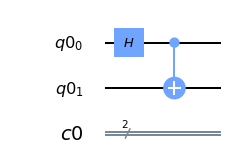

In [7]:
# This is like a logical if in quantum. If then then that. q[1] is the 'target qbit of this operation'.
#By adding Hadamard gate and controlled x we have entangled both the qbits.
circuit.cx(qr[0], qr[1])
circuit.draw(output = 'mpl')

In [8]:
#Measure qbits and store them in the classical register
circuit.measure(qr,cr)

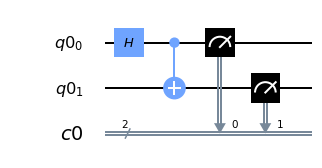

In [9]:
circuit.draw(output = 'mpl')

In [10]:
#Run quantum computer in my classical computer and see what happens. We import simulator from Aer. qasm stands for Quantum Assembly Language.
simulator = Aer.get_backend('qasm_simulator')

In [11]:
#Run circuit in quantum simulator (on a classical computer)
execute(circuit, backend = simulator)

In [12]:
result_c = execute(circuit, backend = simulator).result()

In [13]:
#We need to import the following to visualize
from qiskit.tools.visualization import plot_histogram

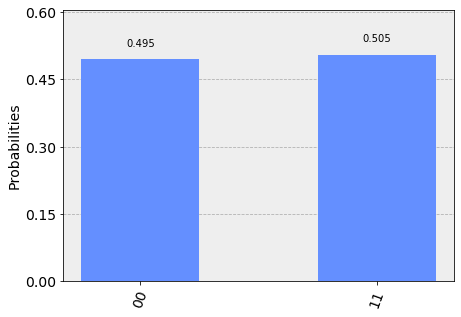

In [14]:
plot_histogram(result_c.get_counts(circuit))

In [15]:
#Run circuit on IBM Quantum Computer to see if results add up. First set provider of QC
provider = IBMQ.get_provider('ibm-q')

In [16]:
#Now give name of QC
qcomp = provider.get_backend('ibmq_london')

In [17]:
job = execute(circuit, backend = qcomp)

In [18]:
#Because IBM QC  is a public computer, we need to see our queue status.
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [19]:
result_q = job.result()

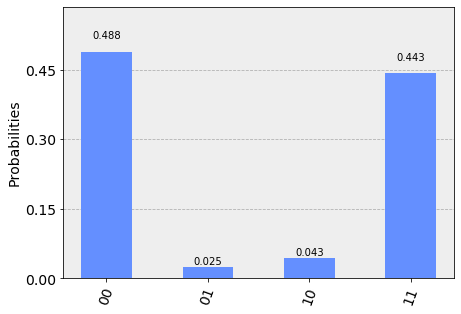

In [20]:
#We see a small chance of 01 and 10 due quantum errors. The simulator above simulates a perfect QC. But and actual quantum number suffers from noise. Research is being done to minimise the noise/errors.. 
plot_histogram(result_q.get_counts(circuit))